In [1]:
import pandas as pd
import numpy as np

In [2]:
#步骤1：读取原始数据
file_path = 'example_data_usb.txt'
raw_df =pd.read_csv(file_path,header=None)

In [3]:
#步骤2：提取有效数据列
 # 用于临时存储提取出的数据块列表
all_data_points = []

with open(file_path, 'r') as f:
    lines = f.readlines()

for line in lines:
        # 去除首尾空白字符
        line = line.strip()
        
        # 跳过空行
        if not line:
            continue
            
        # 使用逗号分割每一行
        parts = line.split(',')
        
        try:
            # 格式分析：
            # # 前2列是 Header信息: [Timestamp, P] -> 索引 0, 1
            # 之后是数据块，格式为 [C, C, C, C, C, C, C, 0] (7个数据 + 1个分隔符/辅助数据)
            # 这样的块在一行中重复出现 1 次
            
            # 起始索引：第4列（索引3）是第一个Channel数据的开始
            base_index = 2
            
            # 每个数据块的步长：7个Channel数据 + 1个分隔位 = 8
            block_stride = 8
            
            # 一行中有 1 个采样块 (Block)
            
            # 计算当前块的起始和结束索引
            start = base_index 
            end = start + 7 # 我们只需要前7个C，不需要第8个0
            
            # 提取这7个通道的数据并转换为浮点数
            # parts[start:end] 获取切片
            channel_data = [float(val) for val in parts[start:end]]
            
            # 将这一时刻的7个数据点加入总列表
            all_data_points.append(channel_data)
            
        except ValueError:
            # 如果遇到无法转换为float的行（例如文件头Header说明行），则跳过
            continue

    # 将列表转换为 NumPy 数组
    # 此时 shape 是 (Total_Samples, 7)
raw_array = np.array(all_data_points)

    # 转置数组以符合通常的信号处理格式：(Channel_Num, Data_Points)
    # 最终 shape 变为 (7, Total_Samples)
eeg_data  = raw_array.T    


In [4]:
# 3. 打印结果查看
print(f"数据处理完成。")
print(f"数组类型: {type(eeg_data)}")
print(f"数组形状 (Channel_num, Data_points): {eeg_data.shape}")
# 打印前几个数据点以验证 (例如打印 Channel 0 的前10个点)
if eeg_data.size > 0:
    print("\nChannel 0 (第一通道) 的前10个数据点:")
    print(eeg_data[0, :10])
    
    print("\nChannel 6 (第七通道) 的前10个数据点:")
    print(eeg_data[6, :10])

数据处理完成。
数组类型: <class 'numpy.ndarray'>
数组形状 (Channel_num, Data_points): (7, 15113)

Channel 0 (第一通道) 的前10个数据点:
[62.137848 58.85214  24.22929  15.065075 31.583015 52.616005 52.01251
 27.470293  9.812415 34.98048 ]

Channel 6 (第七通道) 的前10个数据点:
[25.50334    24.430456    6.258488    0.69290406  4.537404   18.395485
 19.200148    7.554889    0.         10.684134  ]


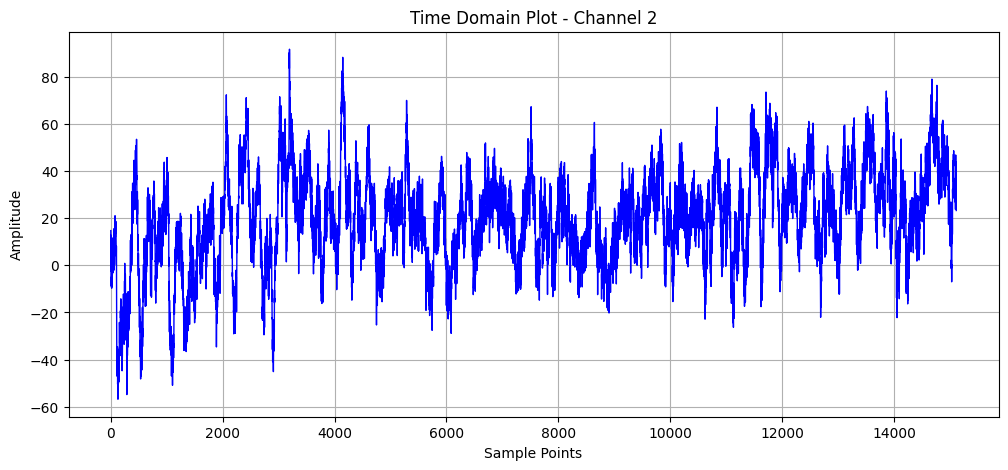

In [5]:
import numpy as np
import matplotlib.pyplot as plt

target_channel = 2 # 选择要查看的通道索引 (0 到 6)

plt.figure(figsize=(12, 5)) # 设置画布大小
plt.plot(eeg_data[target_channel, :], color='blue', linewidth=1)
plt.title(f'Time Domain Plot - Channel {target_channel}') # 标题
plt.xlabel('Sample Points') # X轴：采样点序号
plt.ylabel('Amplitude')     # Y轴：幅值
plt.grid(True)              # 显示网格
plt.show()                  # 显示图像